In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/lou/Desktop/Python/ds_salaries.csv")

In [3]:
#Check DataFrame Size
df.shape

(3755, 11)

In [4]:
#Check Column Names
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
#Check Data Type of Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
#Check Data Completeness
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
#Obtain Summary for the Data 
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [8]:
#Top 10 Highest Paying Records
df.sort_values("salary_in_usd", ascending=False).head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3463,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
1288,2023,SE,FT,Data Analyst,385000,USD,385000,US,0,US,M
3468,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
649,2023,SE,FT,Data Architect,376080,USD,376080,US,100,US,M


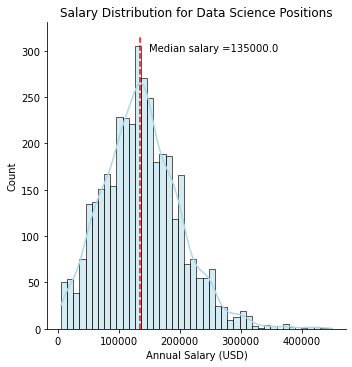

In [9]:
#Salary Distribution for Data Science Positions
sns.displot(x="salary_in_usd", kde=True, color = "lightblue",data=df)
plt.vlines(df["salary_in_usd"].median(), 0, 315,color = "red", linestyle="--")
plt.text(150000,300, "Median salary =" + str(df["salary_in_usd"].median()))
plt.xlabel("Annual Salary (USD)")
plt.title("Salary Distribution for Data Science Positions");

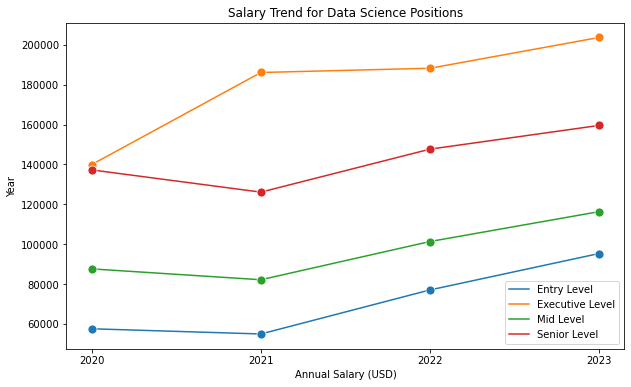

In [10]:
#Salary Trend for Data Science Positions
df["experience_level"] = df["experience_level"].replace("EN","Entry Level")
df["experience_level"] = df["experience_level"].replace("MI","Mid Level")
df["experience_level"] = df["experience_level"].replace("SE","Senior Level")
df["experience_level"] = df["experience_level"].replace("EX","Executive Level")
df2 = df.groupby(["experience_level","work_year"]).mean()
plt.figure(figsize=(10,6))
sns.lineplot(x="work_year", y="salary_in_usd", hue="experience_level",marker="o", markersize=9,errorbar=('ci', False),data=df2)
plt.xticks(range(2020, 2024, 1))
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Year")
plt.title("Salary Trend for Data Science Positions")
plt.legend(title="", loc="lower right");

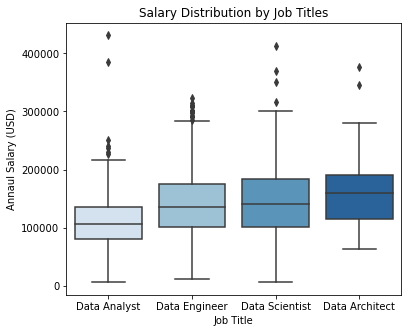

In [11]:
#Salary Comparison Among Most Common Job Titles
df3 = df[(df['job_title'] == "Data Scientist") | (df['job_title'] == "Data Analyst") | (df['job_title'] == "Data Engineer")|(df['job_title'] == "Data Architect")]
plt.figure(figsize=(6,5))
order = df3.groupby("job_title").median().sort_values("salary_in_usd").index
sns.boxplot(y="salary_in_usd", x="job_title", data=df3, order=order, palette="Blues")
plt.xlabel("Job Title")
plt.ylabel("Annaul Salary (USD)")
plt.title("Salary Distribution by Job Titles");

In [12]:
#Top 10 Countries with the most Data Science Job Opportunities
df["company_location"].value_counts().head(10)

US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
GR      14
PT      14
Name: company_location, dtype: int64

In [13]:
#Top 10 Countries Offering Highest Salaries with 5 or more Records
df4 = df[["company_location","salary_in_usd"]]
cal = df4["company_location"].value_counts()
df4 = df4.groupby("company_location").mean().sort_values("salary_in_usd", ascending = False)
df4["no_of_records"] = cal
df4 = df4[df4["no_of_records"]>=5].head(10)
df4 = df4.rename(columns={"salary_in_usd": "Annual Salary (USD)", "no_of_records": "No of Records"})
df4 = df4.rename_axis("Country")
df4

,Annual Salary (USD),No of Records
Country,,
US,151822.009539,3040
CA,131917.689655,87
IE,114943.428571,7
JP,114127.333333,6
MX,97151.100000,10
DE,88288.803571,56
GB,86890.052326,172
CH,81722.000000,5
AU,80033.428571,14


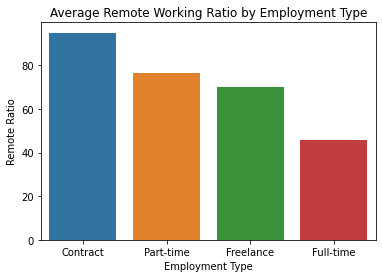

In [14]:
#Flexible Work Arrangements for Data Science Positions by Employment Type
df5 = df.groupby("employment_type").mean().reset_index()
df5 = df5.sort_values("remote_ratio", ascending = False)
df5["employment_type"] = df5["employment_type"].replace("CT","Contract")
df5["employment_type"] = df5["employment_type"].replace("PT","Part-time")
df5["employment_type"] = df5["employment_type"].replace("FL","Freelance")
df5["employment_type"] = df5["employment_type"].replace("FT","Full-time")
sns.barplot(x="employment_type", y="remote_ratio", data=df5)
plt.xlabel("Employment Type")
plt.ylabel("Remote Ratio")
plt.title("Average Remote Working Ratio by Employment Type");